# The Impact of Economic, Society, Health Care and Law on Tobacco Consumption

This study aimed to investigate the impact of different parameters on tobacco consumption in different countries. These parameters are generally categorized into:

- Economic; in this study we considered Tax and affordability.
    - Tax on tabacco usage 
    - Affordability; which covers GDP intrinsically
- Society; in this study we considered happiness and as the indicator of social situation for different country.
- Health Care; we included the score of health warn in this pupose.
- Law; in this study we cosidered three different bans on advertising and ban for places which are allowed for smoking. 


** This study is based on gathered data for the year 2015.

** All data sets are from WHO reports, instead of happiness score which is found from a research which was conducted by kaggle. 

** Domain study is based on WHO reports.

*** Links for data source and domain study will be included later.

*** Explanation about data will be covered later.

In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split

In [106]:
# Read the complete cleaned data that contains all parameters extracted from domain study. 
df = pd.read_csv('data/tobacco_data.csv')

In [107]:
df.head()

,Country,Year,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
0,Albania,2015,51.2,7.6,65.195,4.959,3.920,8,8,3,50.0,8
1,Argentina,2015,29.5,18.4,75.045,6.574,1.310,7,10,5,50.0,8
2,Armenia,2015,52.3,1.5,34.165,4.350,3.945,5,2,0,50.0,3
3,Australia,2015,16.7,13.1,58.515,7.284,2.285,6,2,0,83.0,6
4,Austria,2015,35.5,34.8,74.835,7.200,1.225,7,8,5,65.0,2


## Data distribution

What we like to investigate is the distribution of tobacco consumption in different countries.

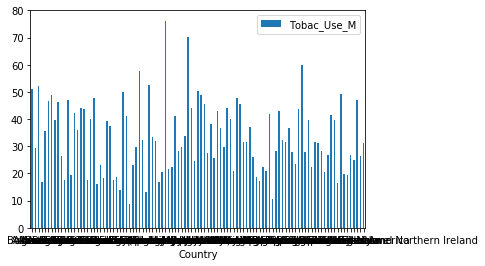

In [108]:
# Male
df.plot.bar(x='Country', y='Tobac_Use_M', rot=0)

(0.0, 30.0)

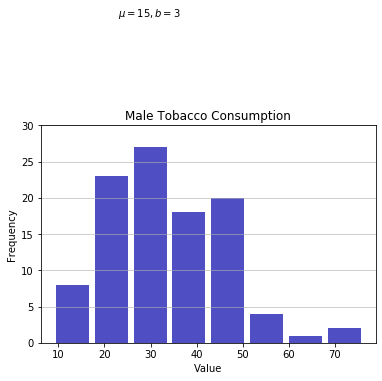

In [109]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['Tobac_Use_M'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Male Tobacco Consumption')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [110]:
df['Tobac_Use_M'].describe()

count    103.000000
mean      33.366990
std       12.935514
min        8.900000
25%       22.750000
50%       31.500000
75%       43.000000
max       76.200000
Name: Tobac_Use_M, dtype: float64

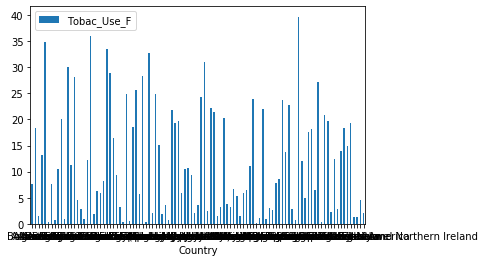

In [111]:
# Female
df.plot.bar(x='Country', y='Tobac_Use_F', rot=0)

(0.0, 40.0)

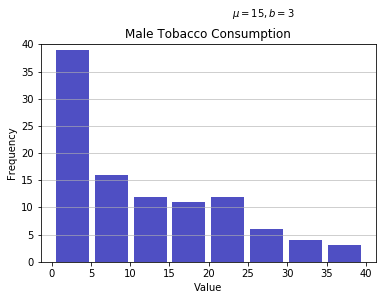

In [112]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['Tobac_Use_F'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Male Tobacco Consumption')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [113]:
df['Tobac_Use_F'].describe()

count    103.000000
mean      11.729126
std       10.371725
min        0.200000
25%        2.700000
50%        8.300000
75%       19.700000
max       39.700000
Name: Tobac_Use_F, dtype: float64

In [114]:
df.drop(['Country', 'Year' ] , axis=1, inplace=True)

## Correlation Matrix

In [67]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
Tobac_Use_M,1,0.0847056,0.0967064,-0.327438,-0.0985019,-0.0689886,-0.203158,-0.187177,-0.10219,0.0125115
Tobac_Use_F,0.0847056,1,0.656236,0.420648,-0.42563,-0.00518897,-0.0535025,-0.0825792,0.164694,0.00868903
Tax_2015,0.0967064,0.656236,1,0.441964,-0.487305,0.0459263,-0.00311081,-0.10922,0.246269,0.16135
Happiness_Score,-0.327438,0.420648,0.441964,1,-0.626922,-0.0272592,-0.00420253,-0.0360306,0.0670242,-0.156774
Afford_2015,-0.0985019,-0.42563,-0.487305,-0.626922,1,-0.155646,-0.000443755,0.0193821,-0.0155854,0.0304187
Ban_Score_Dir_Ads,-0.0689886,-0.00518897,0.0459263,-0.0272592,-0.155646,1,0.611921,0.557217,0.247975,0.207777
Ban_Score_Indr_Ads,-0.203158,-0.0535025,-0.00311081,-0.00420253,-0.000443755,0.611921,1,0.801185,0.190317,0.230062
Ban_Score_add_indir_ads,-0.187177,-0.0825792,-0.10922,-0.0360306,0.0193821,0.557217,0.801185,1,0.177901,0.164753
Warn_Score,-0.10219,0.164694,0.246269,0.0670242,-0.0155854,0.247975,0.190317,0.177901,1,0.298445
Ban_Score_places,0.0125115,0.00868903,0.16135,-0.156774,0.0304187,0.207777,0.230062,0.164753,0.298445,1


#### Explanation: 
The correlation value is in the range of [-1, 1]. The positive value indicates positive impact and so for negative. The value close to boundries (-1 and 1) demonstrate high tangible relation between indicators and on ther side the values close to zero show insignificant relation between indicators.

#### Analytics:
As could be seen on correlation matrix, tobacco usage of men is negatively impacted by happiness and advertisement limitations which makes sense. However, there is no indicator which impact on Men tobacco consumpation. 
Among all it can be seen that tax is the most important influencer of men consumption, which is against what governments claim about it, but this impact is not much significant. There is only one other indicator which has positive impact on men tobacco usage, which is limitation on places where smoking is allowed. Howere this impact is not much cosiderable.

On the other side, women are more influenced by these indicators, as tax an happiness cause more tobacco usage between women, that although show different habitat between women, confirm our hypothesis about tax which increasing the tax won't cause decrease on tobacco usage. However it seems tobacco usage between women is mostly for fun and not one regular habitate.  

However, the negative correlation between affordability and women tobacco usage shows that the more affordable women (who could be from wealty class) are less likely to smoke and this could be because of more alternative fun for wealty women.  

# Linear Regression
https://realpython.com/linear-regression-in-python/


https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22

In [68]:
y_f = np.array(df['Tobac_Use_F'])
y_m = np.array(df['Tobac_Use_M'])

In [69]:
lr_df = df.drop(['Tobac_Use_M', 'Tobac_Use_F'] , axis=1)

In [70]:
x = lr_df.to_numpy()

In [71]:
model_m = LinearRegression().fit(x, y_m)
r_sq_m = model_m.score(x, y_m) 
r_sq_m

0.33691346246582055

In [72]:
print('slope:', model_m.coef_)

slope: [ 0.12635259 -8.20130396 -1.32232896 -0.26062131 -0.52126046 -0.18815666
 -0.04887805 -0.25277603]


In [73]:
model_f = LinearRegression().fit(x, y_f)
r_sq_f = model_f.score(x, y_f) 
r_sq_f

0.46373311879366974

#### Explanation: 
The results show not much satisfying model to map the tobacco usage between countries.


#### R squared definition:
http://www.fairlynerdy.com/what-is-r-squared/
Any R squared value greater than zero means that the regression analysis did better than just using a horizontal line through the mean value.  In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

In [74]:
print('slope:', model_f.coef_)
print('intercept:', model_f.intercept_)

slope: [ 0.27362316  0.93169864 -0.19762503 -0.12680227 -0.28958526  0.31674062
  0.03073524 -0.22666631]
intercept: -7.102598018627804


# Polynomial Regression

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_train, X_test, Y_train, Y_test = train_test_split(x, y_m, test_size=0.3, random_state=1)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
scaler.fit(X_train_poly)
scaler.fit(X_test_poly)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [78]:
# predicting on test data-set
y_test_predict = poly_model.predict(X_test_poly)

In [79]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)

In [80]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

In [81]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 7.09961709247057
R2 score of training set is 0.6658006461297796


The model performance for the test set
-------------------------------------------
RMSE of test set is 24.284463893121796
R2 score of test set is -1.952668333748353


#### Explanation: 
The results show overfitting which could be because of applying more complex kernel over small data set.

# SVM
https://realpython.com/linear-regression-in-python/

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y_m, test_size=0.2, random_state=1)

In [84]:
svr = SVR(kernel='linear', epsilon= 0.1) #Default hyperparameters
svr.fit(X_train,y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(svr.score(X_train,y_train))
print(r2_score(y_test,y_pred_test))
print(rmse_train)
print(rmse_test)
# print('Accuracy Score:', svr.score(X_train, y_pred_train, sample_weight=None))

0.30302966421687705
0.2352757074278976
10.687398876446897
11.269881597485163


R squared intrepretation: https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the

#### Explanation: 
No promising result.

In [219]:
# # evaluating the model on training dataset
# rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
# r2_train = r2_score(y_train, y_train_predicted)
# print(rmse_train, r2_train)

In [220]:
# # evaluating the model on testing dataset
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
# r2_test = r2_score(y_test, y_pred_test)
# print(rmse_test, r2_test)